In [10]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Tải file dữ liệu
df = pd.read_excel('processed_data.xlsx')
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,136.836243,138.995270,136.434784,136.443619,136.443619,3756124824
1,2019-03-02,136.350082,137.184799,132.436386,134.206955,134.206955,3747176425
2,2019-03-03,134.786118,135.849289,131.328857,132.249420,132.249420,3454374053
3,2019-03-04,132.157883,132.729141,125.402702,127.774124,127.774124,4008171341
4,2019-03-05,127.792953,138.229980,126.735298,137.822388,137.822388,4764849990
...,...,...,...,...,...,...,...
1914,2024-05-27,3826.127197,3973.556396,3821.930420,3892.006836,3892.006836,18949181813
1915,2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324
1916,2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736
1917,2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797


In [11]:
# 3. Chia train test validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))
test_size = len(df) - train_size
train_data = df[:train_size]
test_data = df[train_size:]

In [12]:
# 4. Preprocess data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size:]

In [13]:
# 5. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


In [14]:
# 6. Training process
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [15]:
# 7. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [16]:
# 8. Evaluate model accuracy with RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f"Testing RMSE: {test_rmse}")
print(f"Testing MAE: {test_mae}")
print(f"Testing MAPE: {test_mape}%")

Testing RMSE: 543.9589604595908
Testing MAE: 464.08387022898773
Testing MAPE: 15.654536439335063%


In [17]:
#Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
last_30_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# Create a new dataframe with the predicted closing prices
df_next_30_days = pd.DataFrame(y_next_30_days, index=last_30_data, columns=['Close'])

# Print the dataframe
print(df_next_30_days)

#Quá trình tạo index predict 60 ngày tiếp theo
last_index = last_30_data[-1]
last_60_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

# Create a new dataframe with the predicted closing prices
df_next_60_days = pd.DataFrame(y_next_60_days, index=last_60_data, columns=['Close'])

# Print the dataframe
print(df_next_60_days)

#Quá trình tạo index predict 90 ngày tiếp theo
last_index = last_60_data[-1]
last_90_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# Create a new dataframe with the predicted closing prices
df_next_90_days = pd.DataFrame(y_next_90_days, index=last_90_data, columns=['Close'])

# Print the dataframe
print(df_next_90_days)




Predicted closing prices for the next 30 days:
[2856.98235379 2858.32935188 2859.67634996 2861.02334805 2862.37034614
 2863.71734423 2865.06434232 2866.4113404  2867.75833849 2869.10533658
 2870.45233467 2871.79933276 2873.14633084 2874.49332893 2875.84032702
 2877.18732511 2878.5343232  2879.88132128 2881.22831937 2882.57531746
 2883.92231555 2885.26931364 2886.61631172 2887.96330981 2889.3103079
 2890.65730599 2892.00430408 2893.35130216 2894.69830025 2896.04529834]
            Close
1918  2856.982354
1919  2858.329352
1920  2859.676350
1921  2861.023348
1922  2862.370346
1923  2863.717344
1924  2865.064342
1925  2866.411340
1926  2867.758338
1927  2869.105337
1928  2870.452335
1929  2871.799333
1930  2873.146331
1931  2874.493329
1932  2875.840327
1933  2877.187325
1934  2878.534323
1935  2879.881321
1936  2881.228319
1937  2882.575317
1938  2883.922316
1939  2885.269314
1940  2886.616312
1941  2887.963310
1942  2889.310308
1943  2890.657306
1944  2892.004304
1945  2893.351302
1946 

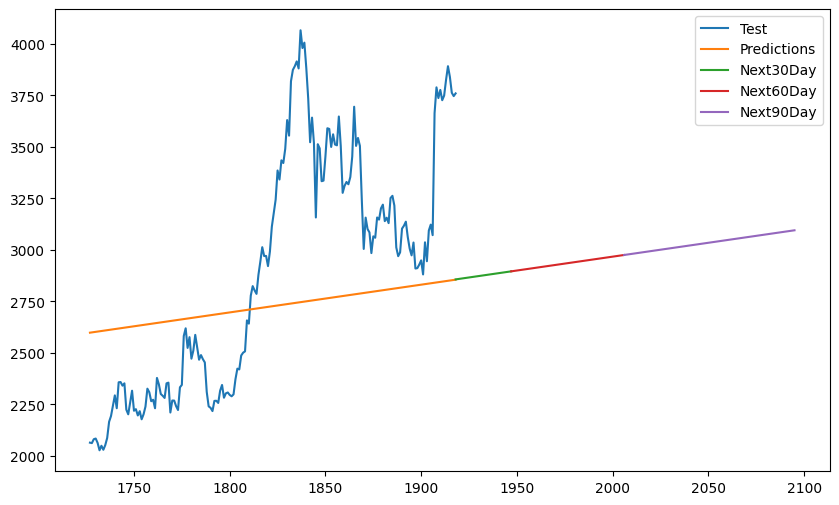

In [18]:
#Vẽ hình
plt.figure(figsize=(10, 6))
# plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_30_data,y_next_30_days)
plt.plot(last_60_data,y_next_60_days)
plt.plot(last_90_data,y_next_90_days)
plt.legend(['Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()